# Insurance Claim Fraud Detection

import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Load the dataset & Data Preprocessing

In [2]:
import pandas as pd

# URL of the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv'

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Print the columns to see if all expected columns are present
print(data.columns)


   328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   

     MALE         MD       craft-repair        sleeping         husband  \
0    MALE         MD  machine-op-inspct         reading  other-relative   
1  FEMALE        PhD              sales     board-games       own-child   
2  FEMALE        PhD       armed-forces     board-games       unmarried   
3    MALE  Associate              sales     board-games       unmarried   
4  FEMALE        PhD       tech-support  bungie-jumping       unmarried   

   53300    0.1  25-01-2015  Single Vehicle Collision   Side Collisi

Assign Column Names

In [55]:
# Assign column names based on the provided structure
column_names = [
    'months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state',
    'policy_csl', 'policy_deductible', 'policy_annual_premium', 'umbrella_limit',
    'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'capital_gains', 'capital_losses',
    'incident_date', 'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage',
    'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount',
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 
    'auto_year','_c39', 'fraud_reported'
]

# Re-load the dataset with header=None if the first row contains data instead of headers
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows to verify if columns are correctly assigned
print(data.head())
print(data.columns)


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductible  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE     

. Data Exploration

In [4]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductible            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# Display summary statistics of the dataset
print(data.describe())


       months_as_customer          age  policy_number  policy_deductible  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital_gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

Check for Missing Values:

In [6]:
# Check for missing values
print(data.isnull().sum())


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductible                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital_gains                     0
capital_losses                    0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductible                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gains                    int64
capital_losses                   int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
data.shape

(1000, 40)

In [9]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductible                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital_gains                   338
capital_losses                  354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

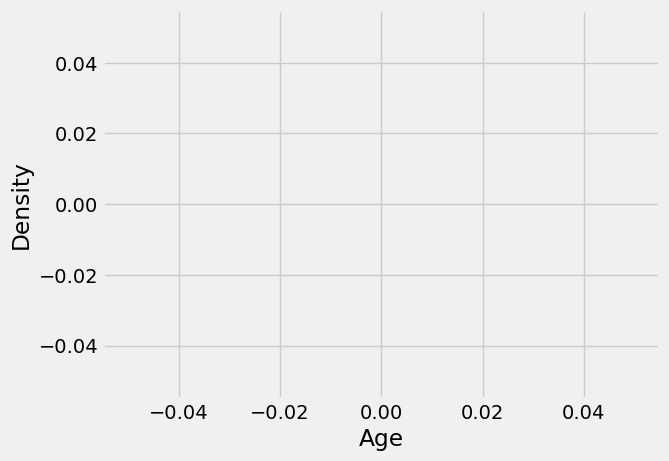

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'age' is the column in your dataset
plt.style.use('fivethirtyeight')

# Plotting the distribution of 'age'
ax = sns.histplot(data['age'], bins=np.arange(19, 64, 5), kde=True)
ax.set_ylabel('Density')
ax.set_xlabel('Age')
plt.show()


In [10]:
# Check unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


policy_bind_date: ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-0

In [27]:
# Fill missing values for features
data['collision_type'].fillna('Unknown', inplace=True)
data['property_damage'].fillna('NO', inplace=True)
data['police_report_available'].fillna('NO', inplace=True)

# Drop rows where the target variable is missing
data = data.dropna(subset=['fraud_reported'])

# Check for missing values again to ensure there are none in the target variable
print(data.isnull().sum())
print(f"Data shape after dropping rows with missing target values: {data.shape}")


months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductible              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital_gains                  0.0
capital_losses                 0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [28]:
# Check the distribution of the target variable
print(data['fraud_reported'].value_counts())


Series([], Name: fraud_reported, dtype: int64)


Encoding Categorical Variables



In [29]:
# Encode categorical variables
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Encode the target variable
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])


: Feature Selection and Scaling

In [32]:
# Select features and target variable
X = data.drop(columns=['fraud_reported', 'policy_number', 'policy_bind_date', 'incident_date', 'insured_zip', 'incident_location', '_c39'])
y = data['fraud_reported']

# Verify the selected features and target variable
print(X.head())
print(y.head())

# Check for any missing values in the features
print(X.isnull().sum())
print(f"Shape of X: {X.shape}")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Empty DataFrame
Columns: [months_as_customer, age, policy_state, policy_csl, policy_deductible, policy_annual_premium, umbrella_limit, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital_gains, capital_losses, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year]
Index: []
Series([], Name: fraud_reported, dtype: int64)
months_as_customer             0.0
age                            0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductible              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
in

ValueError: Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by StandardScaler.

In [25]:
# Select features and target variable
X = data.drop(columns=['fraud_reported', 'policy_number', 'policy_bind_date', 'incident_date', 'insured_zip', 'incident_location', '_c39'])
y = data['fraud_reported']

# Check the shape of X to ensure it is not empty
print(X.shape)


(0, 33)


Model Building and Evaluation

Train the Model

In [49]:
# Print the shape of X_train and y_train_imputed
print(f"X_train shape: {X_train.shape}")
print(f"y_train_imputed shape: {y_train_imputed.shape}")

# Print the first few rows of X_train (assuming it's a 2D array)
print("First few rows of X_train:")
print(X_train[:5])  # Print first 5 rows

# Print the first few values of y_train_imputed
print("First few values of y_train_imputed:")
print(y_train_imputed[:10])  # Print first 10 values


X_train shape: (800, 33)
y_train_imputed shape: (0,)
First few rows of X_train:
[[ 0.32198345  0.66245496 -1.22088596  1.30454172  1.41278352 -0.62245068
  -0.47947582 -0.92854585  1.55787672 -0.1625576  -1.53952998  0.94276629
  -0.90192678  0.95385051  0.76600497  0.31413906 -0.19590615  1.1969631
   0.35176245  0.50605814 -0.95626066 -0.82386498  0.07146695  1.22969265
   0.46183785  0.03580086  1.47368406  1.36651948  1.38946387  1.35197915
  -1.62316948  1.22923079  0.98073258]
 [-1.20771171 -1.7456761   1.18717314  0.06093665 -0.22238259 -0.64109476
  -0.47947582 -0.92854585 -1.00948768  1.08214073 -0.48155496  1.53794703
  -0.90192678 -1.60577551  0.76600497  1.25467517 -1.26061352  0.54395541
  -1.04043721 -1.45161357  0.33909544 -0.82386498  0.07146695  0.00975947
  -1.33869959  1.27031325 -0.01371591 -0.18108395 -0.17617479  0.07263146
  -1.62316948  0.33080162 -0.01712997]
 [ 0.73917304  0.66245496  1.18717314  0.06093665  1.41278352 -0.14340023
  -0.47947582 -0.92854585  1.

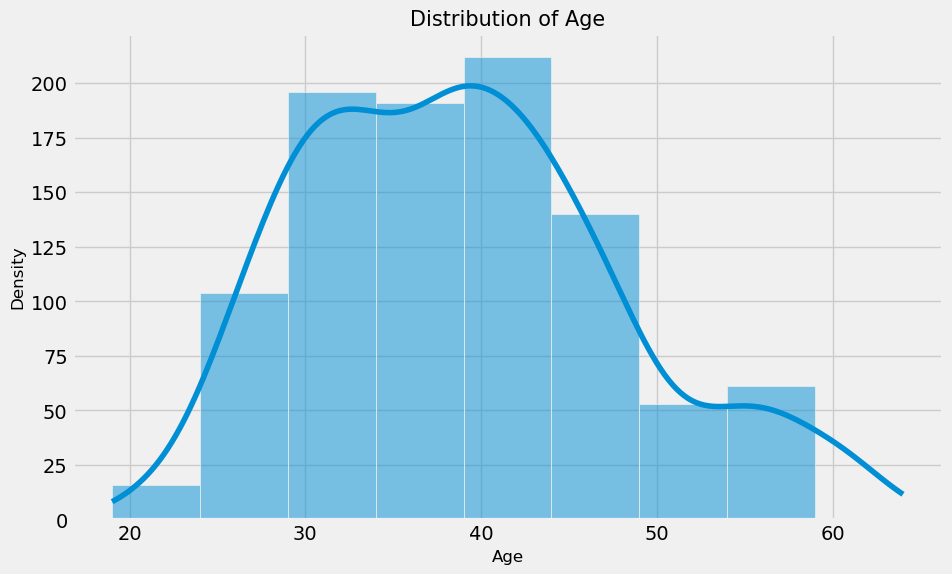

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
plt.style.use('fivethirtyeight')

# Create the distribution plot for the 'age' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['age'], bins=np.arange(19, 64, 5), kde=True, ax=ax)

# Customize the plot with labels
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Age', fontsize=15)

# Display the plot
plt.show()


In [14]:
data['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

Series([], Name: fraud_reported, dtype: int64)

In [12]:
# Assign column names based on the provided structure
column_names = [
    'months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state',
    'policy_csl', 'policy_deductible', 'policy_annual_premium', 'umbrella_limit',
    'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'capital_gains', 'capital_losses',
    'incident_date', 'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage',
    'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount',
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 
    'auto_year','_c39', 'fraud_reported'
]

# Re-load the dataset with header=None if the first row contains data instead of headers
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows to verify if columns are correctly assigned
print(data.head())
print(data.columns)


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductible  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [11]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

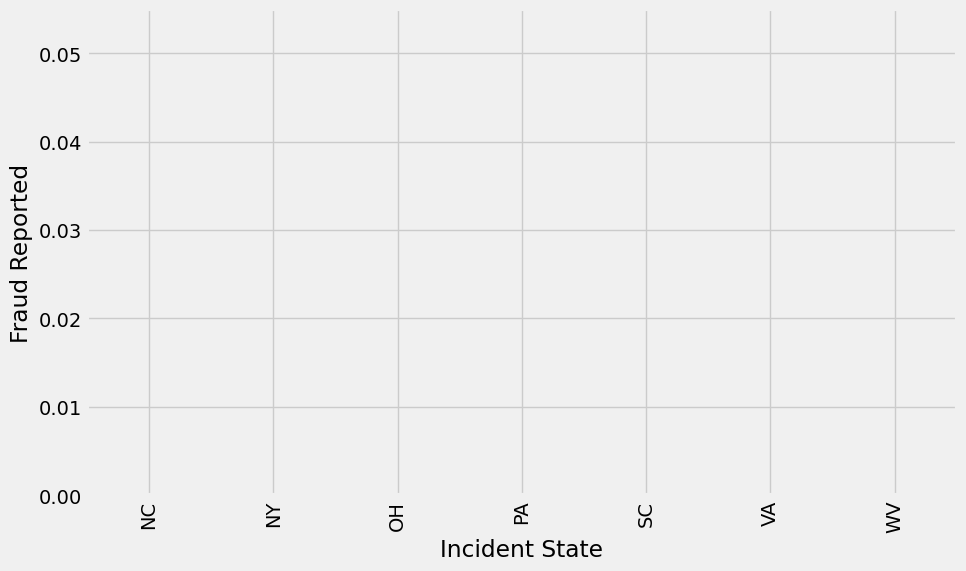

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
plt.style.use('fivethirtyeight')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'incident_state' and count occurrences of 'fraud_reported', then plot as a bar chart
data.groupby('incident_state').fraud_reported.count().plot(kind='bar', ax=ax, ylim=0)

# Customize labels and titles
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')

# Display the plot
plt.show()


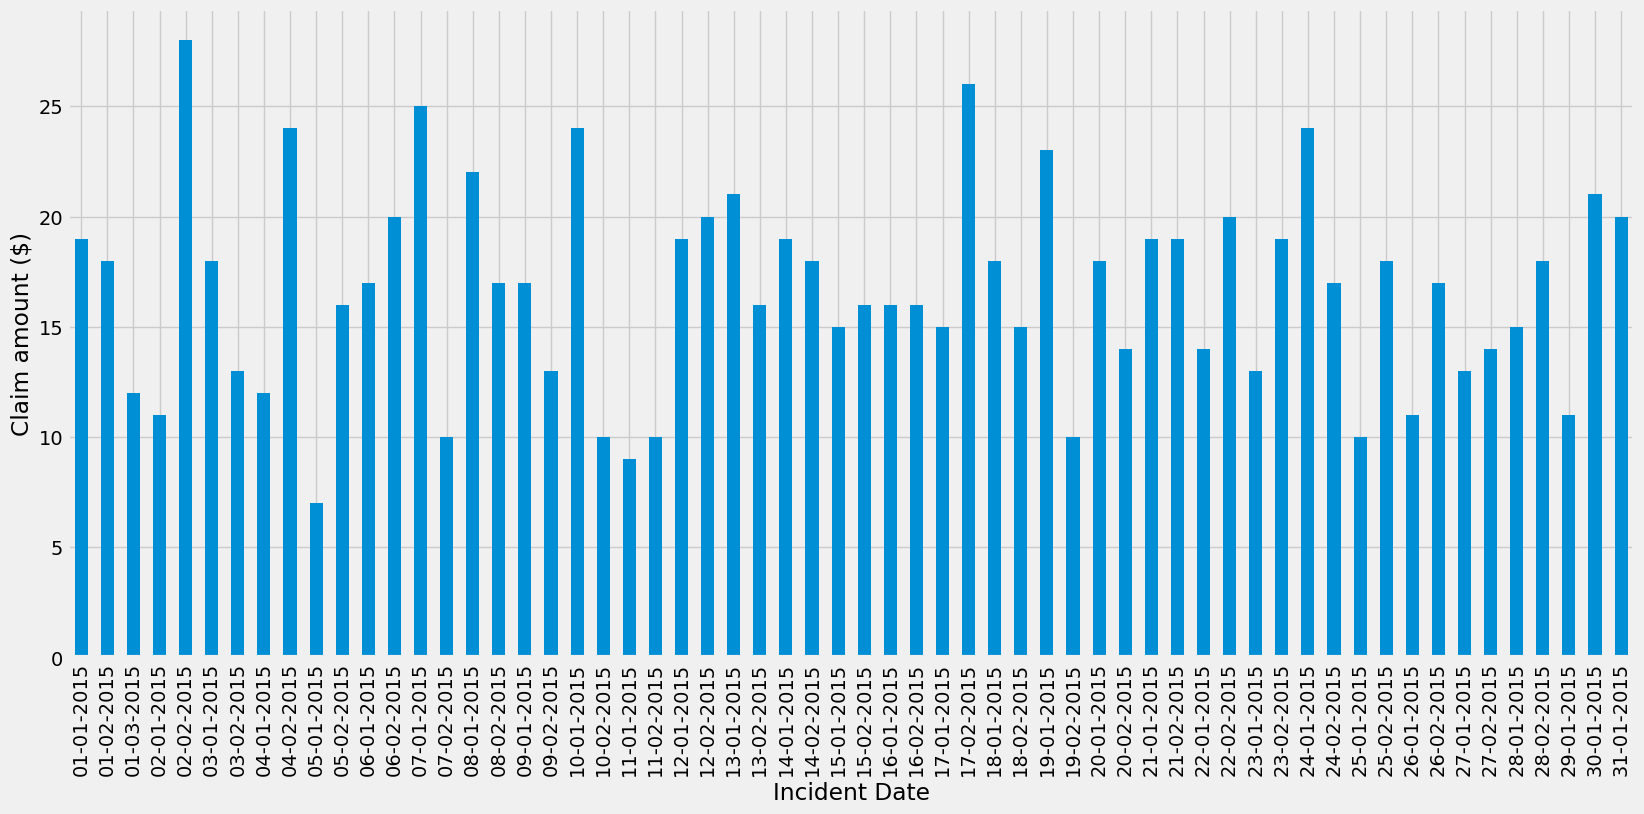

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,8))
ax = data.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
ax.set_xlabel('Incident Date')
plt.show()

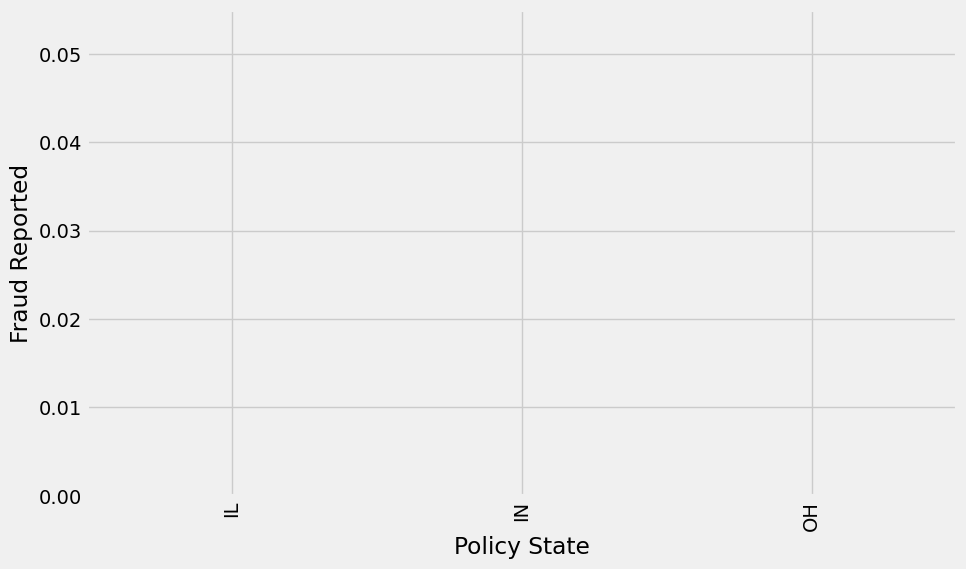

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Policy State')
plt.show()